# Wine Quality Prediction

## Introduction of wine quality data set 

This wine quality data set is obtained originally from UCI Machine Learning Repository, and the revised version data set is from Kaggle. This data set is user-contributed but the vast majority is clean.

This wine quality data set includes white and red vinho verde wine samples from the north of Portugal. Vinho verde is a unique product from the Minho (northwest) region of Portugal. Medium in alcohol is particularly appreciated due to its freshness (especially in the summer).Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). For more details, consult: [Web Link] or the reference [Cortez et al., 2009].

The goal of this wine quality data set is to model wine quality based on physicochemical tests.

Features or input variables included in this data set are: i) type (white and red wine), ii) fixed acidity, iii) volatile acidity, iv) citric acid, v) residual sugar, vi) chlorides, vii) free sulfur dioxide, viii) total sulfur dioxide, ix) density, x) pH, xi) sulphates, xii) alcohol.

Acids (acidity) are major wine properties and contribute greatly to the wine’s taste. They also indicate the process of wine turning into vinegar. Chlorides can be a major contributor to saltiness in wine. Sulfur dioxide is the most common chemical compound used in winemaking. Sulfur serves two main purposes. It prevents the wine from reacting with oxygen which can cause browning and off-odors (oxidation), and it inhibits the growth of bacteria and undesirable wild yeasts in the grape juice and wine. And also sulphates are believed to cause the headache by drinking the wine. Density is generally used as a measure of the conversion of sugar to alcohol. pH is used to specify the acidity and basicity the wine. Of course, alcohol is a very important parameter in the wine because wines are alcoholic beverage. The percentage of alcohol can vary from wine to wine.

The output or target variable based on sensory data is quality (score between 0 and 10).

## Objectives of this project

In this project, the first objective is to build models for evaluating the wine quality based on the physicochemical tests by using supervised machine learning algorithms. The second is to select the best model to predict the wine quality through turning the parameters of the models and comparing the performance of the models.

Now let's take a look this wine quality data set.

# Load data

In [96]:
import pandas as pd
import numpy as np
import scipy
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import time
import warnings
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [98]:
wine_raw_df = pd.read_csv("winequality.csv")
wine_raw_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [99]:
col_list=[
  'type', 
  'fixed_acidity', 
  'volatile_acidity',
  'citric_acidity',
  'residual_suger',
  'chlorides',
  'free_sulfur_dioxide',
  'total_sulfur_dioxide',
  'density',
  'PH',
  'sulphates',
  'alcohol',
  'quality'
  ]
wine_raw_df.columns = col_list

In [101]:
wine_raw_df.shape

(6497, 13)

In [102]:
wine_raw_df.head()

,type,fixed_acidity,volatile_acidity,citric_acidity,residual_suger,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,PH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [103]:
wine_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed_acidity           6497 non-null float64
volatile_acidity        6497 non-null float64
citric_acidity          6497 non-null float64
residual_suger          6497 non-null float64
chlorides               6497 non-null float64
free_sulfur_dioxide     6497 non-null float64
total_sulfur_dioxide    6497 non-null float64
density                 6497 non-null float64
PH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [104]:
wine_raw_df.describe(include="all")

,type,fixed_acidity,volatile_acidity,citric_acidity,residual_suger,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,PH,sulphates,alcohol,quality
count,6497,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,NaN,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,NaN,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,NaN,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,NaN,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,NaN,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000


In [105]:
wine_raw_df.describe()

,fixed_acidity,volatile_acidity,citric_acidity,residual_suger,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,PH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


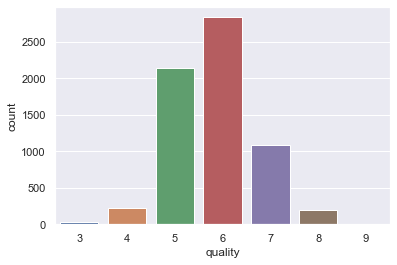

In [106]:
sns.countplot(x="quality", data=wine_raw_df)

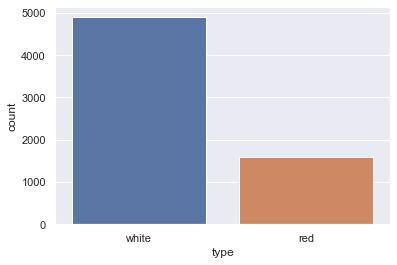

In [107]:
sns.countplot(x="type", data=wine_raw_df)

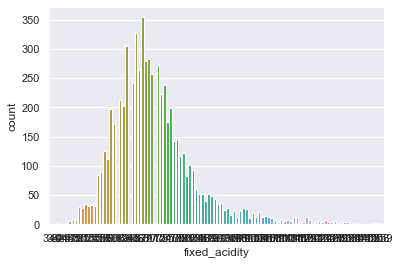

In [108]:
sns.countplot(x="fixed_acidity", data=wine_raw_df)

In [109]:
wine_raw_df.isnull().sum()

type                    0
fixed_acidity           0
volatile_acidity        0
citric_acidity          0
residual_suger          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
PH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# 3. Detect outliers

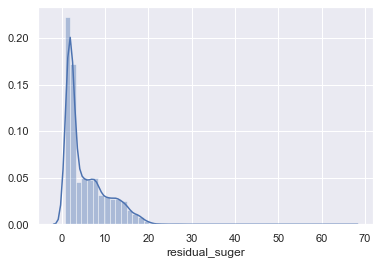

In [111]:
# From statistical description table, residual sugar and free sulfur dioxide have outliers.
# Use Seaborn histogram to detect outliers for these two columns.
# Find the outliers for residual sugar column.
sns.distplot(wine_raw_df['residual_suger'])

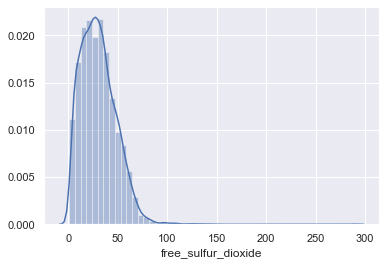

In [113]:
sns.distplot(wine_raw_df['free_sulfur_dioxide'])

it seems that there are obvious outliers in both residual sugar and free sulfur dioxide columns. Hence, let's first clean outliers for these two columns

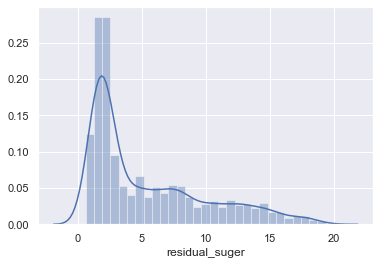

In [119]:
q = wine_raw_df['residual_suger'].quantile(0.995)
wine_df_1 = wine_raw_df[wine_raw_df['residual_suger']<q]
sns.distplot(wine_df_1['residual_suger'])

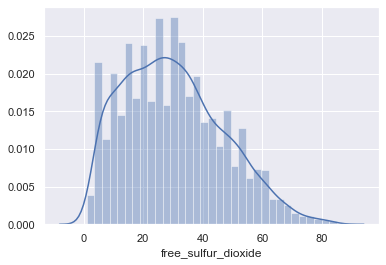

In [120]:
q = wine_df_1['free_sulfur_dioxide'].quantile(0.995)
wine_df_2 = wine_df_1[wine_df_1['free_sulfur_dioxide']<q]
sns.distplot(wine_df_2['free_sulfur_dioxide'])

In [121]:
wine_df_2.shape

(6429, 13)

In [139]:
wine_cleaned_df = wine_df_2

In [140]:
removed_datapoint_percentage = (1- wine_cleaned_df.shape[0]/wine_raw_df.shape[0])*100
removed_datapoint_percentage

1.0466369093427685

After dropping the missing values and outliers, the observations decreased from original 6497 to 6429 and about 1.04%. So, from now dropping the missing values and outliers might not make any meaningful changes in the following analysis.

## Explore data and select features

In [141]:
# Get correlation matrix for numerical variables.
wine_cleaned_df.corr()

,type,fixed_acidity,volatile_acidity,citric_acidity,residual_suger,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,PH,sulphates,alcohol,quality
type,1.000000,-0.486846,-0.654265,0.188247,0.354052,-0.512744,0.490193,0.703173,-0.410527,-0.329328,-0.488205,0.035690,0.122178
fixed_acidity,-0.486846,1.000000,0.217588,0.325428,-0.116264,0.298611,-0.291142,-0.330663,0.473073,-0.253788,0.302014,-0.097346,-0.076612
volatile_acidity,-0.654265,0.217588,1.000000,-0.385142,-0.210100,0.377827,-0.363432,-0.415858,0.273297,0.262576,0.227300,-0.041082,-0.268882
citric_acidity,0.188247,0.325428,-0.385142,1.000000,0.135727,0.039769,0.151260,0.199179,0.090278,-0.334703,0.057119,-0.013569,0.085624
residual_suger,0.354052,-0.116264,-0.210100,0.135727,1.000000,-0.133496,0.440967,0.507706,0.524224,-0.267042,-0.183656,-0.367448,-0.035248
chlorides,-0.512744,0.298611,0.377827,0.039769,-0.133496,1.000000,-0.201004,-0.280435,0.374578,0.044105,0.397260,-0.259341,-0.202582
free_sulfur_dioxide,0.490193,-0.291142,-0.363432,0.151260,0.440967,-0.201004,1.000000,0.727384,0.029143,-0.155010,-0.199411,-0.184172,0.078329
total_sulfur_dioxide,0.703173,-0.330663,-0.415858,0.199179,0.507706,-0.280435,0.727384,1.000000,0.022944,-0.239770,-0.277443,-0.263544,-0.032829
density,-0.410527,0.473073,0.273297,0.090278,0.524224,0.374578,0.029143,0.022944,1.000000,0.019179,0.275296,-0.703615,-0.314458
PH,-0.329328,-0.253788,0.262576,-0.334703,-0.267042,0.044105,-0.155010,-0.239770,0.019179,1.000000,0.188535,0.117837,0.018418


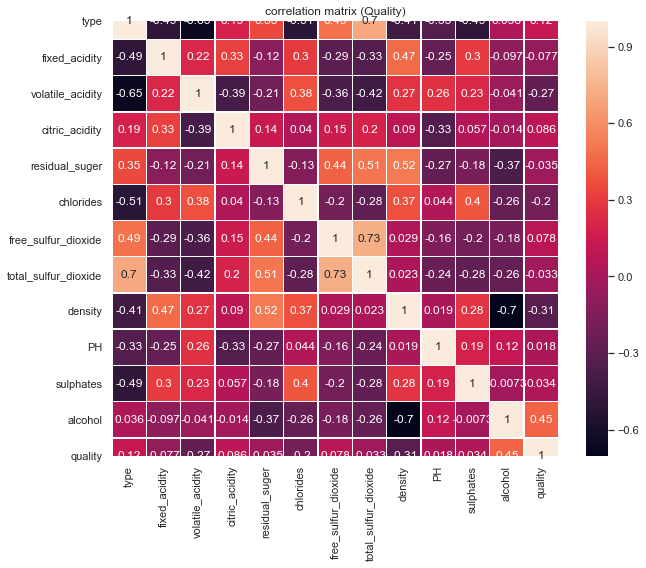

In [142]:
# Make the correlation matrices.
corrmat_wine = wine_cleaned_df.corr()

# Draw the heatmap using seaborn.

plt.figure(figsize=(10,8))

sns.heatmap(corrmat_wine, square=False, annot=True, linewidths=0.5)
plt.title("correlation matrix (Quality)")

plt.show()

In [147]:
import warnings
warnings.filterwarnings('ignore')

# Convert type columns to numerical.
wine_cleaned_df["type"] = pd.get_dummies(wine_cleaned_df.type, drop_first=True)

In [149]:
# Convert target column quality into binary column.
# Define wine quality less than or equal 5 as 0, means not good quality.
# Define wine quality more than 5 as 1, good quality.

wine_cleaned_df['quality_c'] = np.where(wine_cleaned_df['quality']<=5, 0,1)

In [151]:
wine_cleaned_df.quality_c.value_counts()

1    4074
0    2355
Name: quality_c, dtype: int64

In [152]:

quality_percentage = wine_cleaned_df['quality'].value_counts()/wine_cleaned_df.shape[0]*100
quality_percentage

6    43.599316
5    32.897807
7    16.752217
4     3.328667
8     2.939804
3     0.404417
9     0.077773
Name: quality, dtype: float64


## Build models
In this capstone, several supervised machine learning models are used for the prediction.

  1. Logistic regression
  2. Decision Tree
  3. Random Forest
  4. Support Vector
  5. KNeighbors
  6. Gaussian Naive Bayes
  7. GradientBoosting

Based on the target variable is a category, the classification models will be created.


## 1. Logistic Regression

In [154]:
# Target variable, binary variable not good (0) and good (1)
Y = wine_cleaned_df['quality_c']
# Independent variables
X = wine_cleaned_df.drop(['quality', 'quality_c'], axis=1)

# Build the model and tune a variety of model.
import time
start_time = time.perf_counter()

lr = LogisticRegression(solver='lbfgs', max_iter=1500, class_weight='balanced')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=500)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

lr.fit(X_train, y_train)

# Make a prediction

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

The number of observations in training set is 5143
The number of observations in test set is 1286


In [156]:

# Apply cross validation for Logistic Regression model

score = cross_val_score(lr, X_train, y_train, cv=5)
runtime = time.perf_counter() - start_time
print("Runtime: {} Seconds".format(runtime))
print('-------------------------------------------------')
print(score)
print('-------------------------------------------------')
print("Accuracy for train set: %0.3f (+/- %0.3f)" % (score.mean(), score.std() * 2))
print("Accuracy of train set: %0.3f " %lr.score(X_train, y_train))
print("Accuracy of test set: %0.3f " %lr.score(X_test, y_test))
print('-------------------------------------------------')
print(confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------------')
print(classification_report(y_test,y_pred_test))

Runtime: 41187.086087151 Seconds
-------------------------------------------------
[0.72303207 0.70553936 0.74538387 0.71400778 0.72568093]
-------------------------------------------------
Accuracy for train set: 0.723 (+/- 0.027)
Accuracy of train set: 0.725 
Accuracy of test set: 0.734 
-------------------------------------------------
[[375 117]
 [225 569]]
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.76      0.69       492
           1       0.83      0.72      0.77       794

    accuracy                           0.73      1286
   macro avg       0.73      0.74      0.73      1286
weighted avg       0.75      0.73      0.74      1286



In [160]:

# Create the perfomance report from the cross_validate for comparison.
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, X_train, y_train, scoring=scoring, cv=5)
scores.keys()
sorted(scores.keys())

lr_fit_time = scores['fit_time'].mean()
lr_score_time = scores['score_time'].mean()
lr_accuracy = scores['test_accuracy'].mean()
lr_precision = scores['test_precision_macro'].mean()
lr_recall = scores['test_recall_macro'].mean()
lr_f1 = scores['test_f1_weighted'].mean()
lr_roc = scores['test_roc_auc'].mean()

In [161]:
# Target variable
Y1 = wine_cleaned_df['quality_c']
# Independent variables
X1 = wine_cleaned_df.drop(['quality','quality_c'], axis=1)

lr = LogisticRegression()

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=500)

from sklearn.model_selection import GridSearchCV

parameters = [{'C': [1.0, 10, 100, 1000], 'class_weight':[None, 'balanced'], 
               'solver':['lbfgs','newton-cg'],'max_iter':[1000, 1500, 2000] }]


grid_search = GridSearchCV(estimator=lr,
                          param_grid=parameters,
                          cv=5)

grid_search =  grid_search.fit(X1_train, y1_train)
print(grid_search.best_params_)

{'C': 100, 'class_weight': None, 'max_iter': 1000, 'solver': 'newton-cg'}


In [ ]:
y_pred_test = grid_search.predict(X1_test)
y_pred_train = lgrid_search.predict(X1_train)

In [163]:
score = cross_val_score(lr, X_train, y_train, cv=5)
runtime = time.perf_counter() - start_time
print("Runtime: {} Seconds".format(runtime))
print('-------------------------------------------------')
print(score)
print('-------------------------------------------------')
print("Accuracy for train set: %0.3f (+/- %0.3f)" % (score.mean(), score.std() * 2))
print("Accuracy of train set: %0.3f " %grid_search.score(X1_train, y1_train))
print("Accuracy of test set: %0.3f " %grid_search.score(X1_test, y1_test))
print('-------------------------------------------------')
print(confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------------')
print(classification_report(y_test,y_pred_test))

Runtime: 43909.51245859599 Seconds
-------------------------------------------------
[0.73275024 0.72594752 0.77065112 0.73638132 0.73735409]
-------------------------------------------------
Accuracy for train set: 0.741 (+/- 0.031)
Accuracy of train set: 0.748 
Accuracy of test set: 0.741 
-------------------------------------------------
[[375 117]
 [225 569]]
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.76      0.69       492
           1       0.83      0.72      0.77       794

    accuracy                           0.73      1286
   macro avg       0.73      0.74      0.73      1286
weighted avg       0.75      0.73      0.74      1286



## 2. Decision Tree

In [164]:
# Target variable
Y = wine_cleaned_df['quality_c']
# Independent variables
X = wine_cleaned_df.drop(['quality','quality_c'], axis=1)

from sklearn.tree import DecisionTreeClassifier

# Build the model and tune a variety of model.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=500)

import time
start_time = time.perf_counter()

dtc = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dtc.fit(X_train, y_train)

# Make a prediction
y_pred_test = dtc.predict(X_test)
y_pred_train = dtc.predict(X_train)

# Apply cross validation for Decision Tree model
score = cross_val_score(dtc, X_train, y_train, cv=5)

runtime = time.perf_counter() - start_time
print("Runtime: {} Seconds".format(runtime))
print('-------------------------------------------------')
print(score)
print('-------------------------------------------------')
print("Accuracy for train set: %0.3f (+/- %0.3f)" % (score.mean(), score.std() * 2))
print("Accuracy of train set: %0.3f " %dtc.score(X_train, y_train))
print("Accuracy of test set: %0.3f " %dtc.score(X_test, y_test))
print('-------------------------------------------------')
print(confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------------')
print(classification_report(y_test,y_pred_test))

Runtime: 0.13625621399842203 Seconds
-------------------------------------------------
[0.72789116 0.70942663 0.74246842 0.72470817 0.71303502]
-------------------------------------------------
Accuracy for train set: 0.724 (+/- 0.023)
Accuracy of train set: 0.755 
Accuracy of test set: 0.755 
-------------------------------------------------
[[384 108]
 [207 587]]
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.78      0.71       492
           1       0.84      0.74      0.79       794

    accuracy                           0.76      1286
   macro avg       0.75      0.76      0.75      1286
weighted avg       0.77      0.76      0.76      1286



In [165]:
# Create the perfomance report from the cross_validate for comparison.
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(dtc, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
dtc_fit_time = scores['fit_time'].mean()
dtc_score_time = scores['score_time'].mean()
dtc_accuracy = scores['test_accuracy'].mean()
dtc_precision = scores['test_precision_macro'].mean()
dtc_recall = scores['test_recall_macro'].mean()
dtc_f1 = scores['test_f1_weighted'].mean()
dtc_roc = scores['test_roc_auc'].mean()

## 3. Random Forest Tree Model

In [166]:
# Target variable
Y = wine_cleaned_df['quality_c']
# Independent variables
X = wine_cleaned_df.drop(['quality','quality_c'], axis=1)

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=500)

# Build the model and tune a variety of model.
import time
start_time = time.process_time()

rfc = RandomForestClassifier(n_estimators=15, class_weight='balanced')
rfc.fit(X_train, y_train)

# Make a prediction
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

# Apply cross validation for Random Forest model

score = cross_val_score(rfc, X_train, y_train, cv=5)
runtime = time.process_time() - start_time
print("Runtime: {} Seconds".format(runtime))
print('-------------------------------------------------')
print(score)
print('-------------------------------------------------')
print("Accuracy for train set: %0.3f (+/- %0.3f)" % (score.mean(), score.std() * 2))
print("Accuracy of train set: %0.3f " %rfc.score(X_train, y_train))
print("Accuracy of test set: %0.3f " %rfc.score(X_test, y_test))
print('-------------------------------------------------')
print(confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------------')
print(classification_report(y_test,y_pred_test))

Runtime: 1.2713139999999612 Seconds
-------------------------------------------------
[0.80660836 0.80466472 0.80660836 0.80642023 0.79766537]
-------------------------------------------------
Accuracy for train set: 0.804 (+/- 0.007)
Accuracy of train set: 0.995 
Accuracy of test set: 0.813 
-------------------------------------------------
[[338 154]
 [ 87 707]]
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       492
           1       0.82      0.89      0.85       794

    accuracy                           0.81      1286
   macro avg       0.81      0.79      0.80      1286
weighted avg       0.81      0.81      0.81      1286



In [167]:
# Create the perfomance report from the cross_validate for comparison.
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(rfc, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
rfc_fit_time = scores['fit_time'].mean()
rfc_score_time = scores['score_time'].mean()
rfc_accuracy = scores['test_accuracy'].mean()
rfc_precision = scores['test_precision_macro'].mean()
rfc_recall = scores['test_recall_macro'].mean()
rfc_f1 = scores['test_f1_weighted'].mean()
rfc_roc = scores['test_roc_auc'].mean()

## 4. Support Vector Machines 

In [169]:
# Target variable
Y = wine_cleaned_df['quality_c']
# Independent variables
X = wine_cleaned_df.loc[:, ~wine_cleaned_df.columns.isin(['quality', 'quality_c'])]

# Build the model and tune a variety of model.
import time
start_time = time.process_time()

svm = SVC(kernel = 'linear')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=500)
svm.fit(X_train, y_train)

# Make a prediction
y_pred_test = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

# Apply cross validation for Support Vector model

score = cross_val_score(svm, X_train, y_train, cv=5)

runtime = time.process_time() - start_time
print("Runtime: {} Seconds".format(runtime))
print('-------------------------------------------------')

print(score)
print('-------------------------------------------------')
print("Accuracy for train set: %0.3f (+/- %0.3f)" % (score.mean(), score.std() * 2))
print("Accuracy of train set: %0.3f " %svm.score(X_train, y_train))
print("Accuracy of test set: %0.3f " %svm.score(X_test, y_test))
print('-------------------------------------------------')
print(confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------------')
print(classification_report(y_test,y_pred_test))

Runtime: 182.70870200000002 Seconds
-------------------------------------------------
[0.73760933 0.75218659 0.78328474 0.74416342 0.7266537 ]
-------------------------------------------------
Accuracy for train set: 0.749 (+/- 0.038)
Accuracy of train set: 0.752 
Accuracy of test set: 0.750 
-------------------------------------------------
[[289 203]
 [118 676]]
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.59      0.64       492
           1       0.77      0.85      0.81       794

    accuracy                           0.75      1286
   macro avg       0.74      0.72      0.73      1286
weighted avg       0.75      0.75      0.74      1286



In [171]:
# Create the perfomance report from the cross_validate for comparison.
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(svm, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
svm_fit_time = scores['fit_time'].mean()
svm_score_time = scores['score_time'].mean()
svm_accuracy = scores['test_accuracy'].mean()
svm_precision = scores['test_precision_macro'].mean()
svm_recall = scores['test_recall_macro'].mean()
svm_f1 = scores['test_f1_weighted'].mean()
svm_roc = scores['test_roc_auc'].mean()

## 5. KNeighbors Model 

In [172]:
# Target variable
Y = wine_cleaned_df['quality_c']
# Independent variables
X = wine_cleaned_df.loc[:, ~wine_cleaned_df.columns.isin(['quality', 'quality_c'])]

# Build the model and tune a variety of model.
from sklearn.neighbors import KNeighborsClassifier
import time
start_time = time.process_time()

neighbors = KNeighborsClassifier(n_neighbors=7)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=500)
neighbors.fit(X_train,y_train)

# Make a prediction
y_pred_test = neighbors.predict(X_test)
y_pred_train = neighbors.predict(X_train)

# Apply cross validation for KNN model

score = cross_val_score(neighbors, X_train, y_train, cv=5)
runtime = time.process_time() - start_time
print("Runtime: {} Seconds".format(runtime))
print('-------------------------------------------------')
print(score)
print('-------------------------------------------------')
print("Accuracy for train set: %0.3f (+/- %0.3f)" % (score.mean(), score.std() * 2))
print("Accuracy of train set: %0.3f " %neighbors.score(X_train, y_train))
print("Accuracy of test set: %0.3f " %neighbors.score(X_test, y_test))
print('-------------------------------------------------')
print(confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------------')
print(classification_report(y_test,y_pred_test))

Runtime: 0.8326260000001184 Seconds
-------------------------------------------------
[0.6851312  0.68027211 0.65500486 0.6692607  0.67607004]
-------------------------------------------------
Accuracy for train set: 0.673 (+/- 0.021)
Accuracy of train set: 0.759 
Accuracy of test set: 0.666 
-------------------------------------------------
[[223 269]
 [160 634]]
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.45      0.51       492
           1       0.70      0.80      0.75       794

    accuracy                           0.67      1286
   macro avg       0.64      0.63      0.63      1286
weighted avg       0.66      0.67      0.66      1286



In [173]:
# Create the perfomance report from the cross_validate for comparison.
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(neighbors, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
knn_fit_time = scores['fit_time'].mean()
knn_score_time = scores['score_time'].mean()
knn_accuracy = scores['test_accuracy'].mean()
knn_precision = scores['test_precision_macro'].mean()
knn_recall = scores['test_recall_macro'].mean()
knn_f1 = scores['test_f1_weighted'].mean()
knn_roc = scores['test_roc_auc'].mean()

## 6. Gaussian Naive Bayes

In [174]:
# Target variable
Y = wine_cleaned_df['quality_c']
# Independent variables
X = wine_cleaned_df.drop(['quality','quality_c'], axis=1)

from sklearn.naive_bayes import GaussianNB
# Build the model and tune a variety of model.
import time
start_time = time.process_time()

gnb = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=500)
gnb.fit(X_train, y_train)

# Make a prediction
y_pred_test = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)

# Apply cross validation for  Gaussian Naive Bayes model

score = cross_val_score(gnb, X_train, y_train, cv=5)
runtime = time.process_time() - start_time
print("Runtime: {} Seconds".format(runtime))
print('-------------------------------------------------')
print(score)
print('-------------------------------------------------')
print("Accuracy for train set: %0.3f (+/- %0.3f)" % (score.mean(), score.std() * 2))
print("Accuracy of train set: %0.3f " %gnb.score(X_train, y_train))
print("Accuracy of test set: %0.3f " %gnb.score(X_test, y_test))
print('-------------------------------------------------')
print(confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------------')
print(classification_report(y_test,y_pred_test))

Runtime: 0.08323399999994763 Seconds
-------------------------------------------------
[0.66375121 0.65306122 0.67541302 0.68093385 0.66731518]
-------------------------------------------------
Accuracy for train set: 0.668 (+/- 0.019)
Accuracy of train set: 0.676 
Accuracy of test set: 0.699 
-------------------------------------------------
[[261 231]
 [156 638]]
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.63      0.53      0.57       492
           1       0.73      0.80      0.77       794

    accuracy                           0.70      1286
   macro avg       0.68      0.67      0.67      1286
weighted avg       0.69      0.70      0.69      1286



In [175]:
# Create the perfomance report from the cross_validate for comparison.
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(gnb, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
gnb_fit_time = scores['fit_time'].mean()
gnb_score_time = scores['score_time'].mean()
gnb_accuracy = scores['test_accuracy'].mean()
gnb_precision = scores['test_precision_macro'].mean()
gnb_recall = scores['test_recall_macro'].mean()
gnb_f1 = scores['test_f1_weighted'].mean()
gnb_roc = scores['test_roc_auc'].mean()

## 7. GradientBoosting Model

In [176]:
# Target variable
Y = wine_cleaned_df['quality_c']
# Independent variables
X = wine_cleaned_df.loc[:, ~wine_cleaned_df.columns.isin(['quality', 'quality_c'])]

# Build the model and tune a variety of model.
# We'll make 400 iterations, use 2-deep trees, and set our loss function.
import time
start_time = time.process_time()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=500)

# Initialize and fit the model.
gbc = ensemble.GradientBoostingClassifier(n_estimators=400,
          max_depth=4,
          loss='deviance')
gbc.fit(X_train, y_train)

# Make a prediction
y_pred_train = gbc.predict(X_train)
y_pred_test = gbc.predict(X_test)

# Apply cross validation for Gradient Boosting model

score = cross_val_score(gbc, X_train, y_train, cv=5)

runtime = time.process_time() - start_time
print("Runtime: {} Seconds".format(runtime))
print('-------------------------------------------------')
print(score)
print('-------------------------------------------------')
print("Accuracy for train set: %0.3f (+/- %0.3f)" % (score.mean(), score.std() * 2))
print("Accuracy of train set: %0.3f " %gbc.score(X_train, y_train))
print("Accuracy of test set: %0.3f " %gbc.score(X_test, y_test))
print('-------------------------------------------------')
print(confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------------')
print(classification_report(y_test,y_pred_test))

Runtime: 16.72122400000012 Seconds
-------------------------------------------------
[0.81535471 0.79397473 0.81535471 0.79474708 0.79280156]
-------------------------------------------------
Accuracy for train set: 0.802 (+/- 0.021)
Accuracy of train set: 0.942 
Accuracy of test set: 0.805 
-------------------------------------------------
[[346 146]
 [105 689]]
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       492
           1       0.83      0.87      0.85       794

    accuracy                           0.80      1286
   macro avg       0.80      0.79      0.79      1286
weighted avg       0.80      0.80      0.80      1286



In [177]:
# Create the perfomance report from the cross_validate for comparison.
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(gbc, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
gbc_fit_time = scores['fit_time'].mean()
gbc_score_time = scores['score_time'].mean()
gbc_accuracy = scores['test_accuracy'].mean()
gbc_precision = scores['test_precision_macro'].mean()
gbc_recall = scores['test_recall_macro'].mean()
gbc_f1 = scores['test_f1_weighted'].mean()
gbc_roc = scores['test_roc_auc'].mean()

## Compare the performance of the models

In [178]:

# Create a table for comparing the evaluation results of the models.
models_comparison_df = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree','Random Forest', 'Support Vector Machines', 'KNeighbors', 'Gaussian Naive Bayes',
             'GradientBoosting'],
    'Fit_time':[lr_fit_time, dtc_fit_time, rfc_fit_time, svm_fit_time, knn_fit_time, gnb_fit_time, gbc_fit_time],
    'Score_time':[lr_score_time, dtc_score_time, rfc_score_time, svm_score_time,knn_score_time,gnb_score_time,gbc_score_time,],
    'Accuracy':[lr_accuracy,dtc_accuracy,rfc_accuracy,svm_accuracy,knn_accuracy,gnb_accuracy,gbc_accuracy],
    'Precision':[lr_precision,dtc_precision,rfc_precision,svm_precision,knn_precision,gnb_precision,gbc_precision],
    'Recall':[lr_recall,dtc_recall,rfc_recall,svm_recall,knn_recall,gnb_recall,gbc_recall],
    'F1_score':[lr_f1,dtc_f1,rfc_f1,svm_f1,knn_f1,gnb_f1,gbc_f1],
    'ROC_AUC':[lr_roc,dtc_roc,rfc_roc,svm_roc,knn_roc,gnb_roc,gbc_roc],
}, columns=['Model','Fit_time', 'Score_time','Accuracy','Precision','Recall','F1_score','ROC_AUC'])

models_comparison_df.sort_values(by='Accuracy', ascending=False)

,Model,Fit_time,Score_time,Accuracy,Precision,Recall,F1_score,ROC_AUC
2,Random Forest,0.097429,0.024919,0.803420,0.792079,0.773879,0.800234,0.871314
6,GradientBoosting,1.356570,0.042642,0.803225,0.789514,0.778363,0.801290,0.861798
3,Support Vector Machines,13.808195,0.145423,0.748780,0.732376,0.705287,0.740728,0.799035
1,Decision Tree,0.013861,0.011194,0.723700,0.713111,0.728299,0.728413,0.789952
0,Logistic Regression,0.442988,0.012191,0.722729,0.712425,0.727655,0.727475,0.799859
4,KNeighbors,0.004592,0.158372,0.673148,0.639653,0.621768,0.662084,0.693292
5,Gaussian Naive Bayes,0.003520,0.013387,0.668095,0.636380,0.626367,0.661655,0.733928


In [179]:
models_comparison_df.sort_values(by='Accuracy', ascending=False).style.set_table_styles(
[{'selector': 'tr:hover',
  'props': [('background-color', 'yellow')]}]
)

,Model,Fit_time,Score_time,Accuracy,Precision,Recall,F1_score,ROC_AUC
2,Random Forest,0.0974288,0.0249187,0.80342,0.792079,0.773879,0.800234,0.871314
6,GradientBoosting,1.35657,0.0426422,0.803225,0.789514,0.778363,0.80129,0.861798
3,Support Vector Machines,13.8082,0.145423,0.74878,0.732376,0.705287,0.740728,0.799035
1,Decision Tree,0.013861,0.0111936,0.7237,0.713111,0.728299,0.728413,0.789952
0,Logistic Regression,0.442988,0.0121912,0.722729,0.712425,0.727655,0.727475,0.799859
4,KNeighbors,0.00459199,0.158372,0.673148,0.639653,0.621768,0.662084,0.693292
5,Gaussian Naive Bayes,0.00352044,0.0133867,0.668095,0.63638,0.626367,0.661655,0.733928


From the models comparison table, it can be concluded that the Random Forest model provide the highest accuracy for this wine quality datas set. It has the highest accuracy of about 80.8% and the ROC value is also very good (0.873). Gradient Boosting model through tuning the parameter, it also has high accuracy but it needs more running time compared with the Random Forest. In addition, Support Vector Machines need the longest running time among these 7 models.



## Feature importance for the Random Forest Model¶


In [180]:
# Create feature importance for the Random Forest Model.
rfc.feature_importances_

array([0.00570787, 0.06178694, 0.11342115, 0.07355955, 0.07626885,
       0.0812294 , 0.08302857, 0.08002519, 0.09796173, 0.07114206,
       0.07231698, 0.1835517 ])

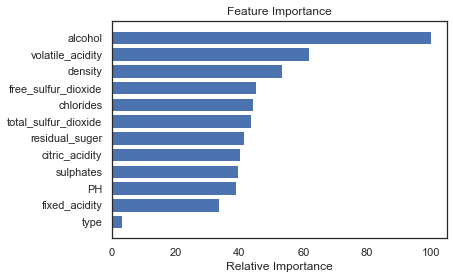

In [181]:
feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

sns.set_style('white')
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

It appears that alcohol, volatile acidity and density are the most important features in predicting wine quality. This is reasonable. Wines are alcoholic beverage. Density indicates the conversion of sugar to alcohol. Acidity and density (sugar) can influence the taste of the wine. Hence these features shows more important than others.

# Conclusions

 1. From the models comparison, it can be observed that the Random Forest is the best model for predicting the wine quality.
 2. The random forest model has about overall 82% accuracy for prediction. 
 3. The Gradient Boosting model is also a good model but has slow running speed compared to the Random Forest model.
 4. Compared with other 6 models, support vector machines have the longest running time.
 5. The three features of alcohol, volatile acidity and density seems the most important features in predicting wine quality.
 6. The model built in this project is based on wine physicochemical properties and very good for predicting the wine quality. If physicochemical properties of wines are provided, the wine producer could gain insight and information about their wine quality through the model.
 7. The data set gives the red and white wine info, but no any data about grape types, wine brand, location, temperature, etc. This limits the model in real world practical applications.